<h1>Linear regression</h1>

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

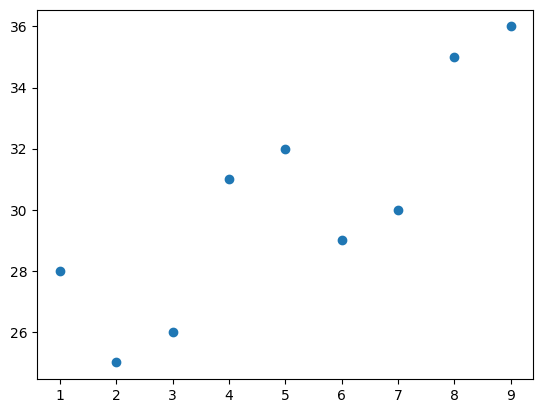

In [3]:
x = np.arange(1,10)
y= np.array([28, 25, 26, 31, 32, 29, 30, 35, 36])
plt.scatter(x,y)
plt.show()

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)
yhat = reg.predict(x)
yhat


array([[25.68888889],
       [26.82222222],
       [27.95555556],
       [29.08888889],
       [30.22222222],
       [31.35555556],
       [32.48888889],
       [33.62222222],
       [34.75555556]])

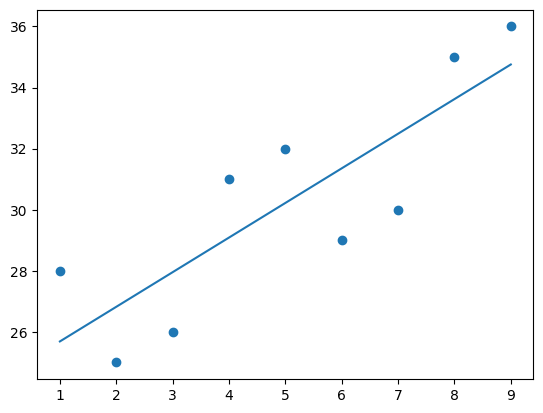

In [7]:
plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()

In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Result'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Result
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
from sklearn.model_selection import train_test_split

x = diabetes.data
y = diabetes.target
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

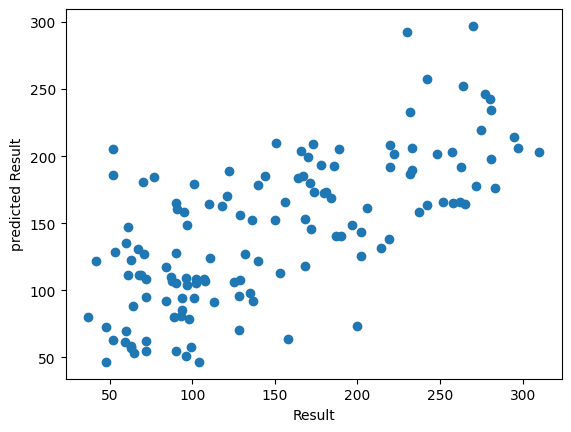

In [10]:
plt.scatter(y_test, y_pred)
plt.plot()
plt.xlabel('Result')
plt.ylabel('predicted Result')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

2821.7509810013107

In [17]:
new_x = diabetes.data[:,[1,2,3,5,6]]
new_y = diabetes.target
new_x_train, new_x_test ,new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state=42)
new_reg = LinearRegression()
new_reg.fit(new_x_train, new_y_train)
new_y_predict = new_reg.predict(new_x_test)
new_mse = mean_squared_error(new_y_test, new_y_predict)
new_mse

3441.590057815222

<h1>Regularization Regression</h1>

[ 0.00000000e+00 -7.56121328e+01  5.11404133e+02  2.34508645e+02
 -0.00000000e+00 -0.00000000e+00 -1.70214828e+02  0.00000000e+00
  4.50678492e+02  2.24851976e-01]


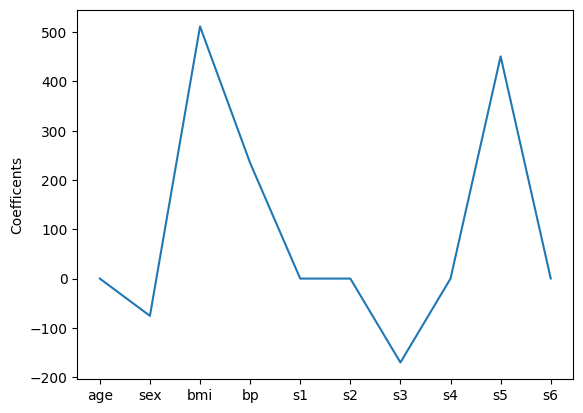

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2)
lasso.fit(x, y)
lasso_coef = lasso.coef_
print(lasso_coef)
plt.plot(range(10), lasso_coef)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Coefficents')
plt.show()